# Importing all the crucial libraries at one section of code.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Establishing the basics of the the region of interest and the mask as well as the detection algorithm on a single image before we go on test the algorithm on a video.

In [3]:
# Function for Histogram_equalisation
def equalisation_histogram(test_img):
    # Convert the image to YUV color space
    yuv = cv2.cvtColor(test_img, cv2.COLOR_BGR2YUV)
    # Split the channels
    y, u, v = cv2.split(yuv)
    # Apply histogram equalization on the Y channel
    y_eq = cv2.equalizeHist(y)
    # Merge the channels back
    yuv_eq = cv2.merge((y_eq, u, v))
    # Convert back to BGR color space
    img_eq = cv2.cvtColor(yuv_eq, cv2.COLOR_YUV2BGR)
    return img_eq

def sharpen_image(img):
    kernal = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    sharpened = cv2.filter2D(img, -1, kernal)
    return sharpened
def max_filter(img, kernel_size):
    # Create a max filter kernel
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    # Apply the max filter
    max_filtered = cv2.dilate(img, kernel)
    return max_filtered

def min_filter(img, kernel_size):
    # Create a min filter kernel
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    # Apply the min filter
    min_filtered = cv2.erode(img, kernel)
    return min_filtered

def closing(img, kernel_size):
    # Create a closing kernel
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    # Apply the closing operation
    closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    return closed

def supress_colours(img, lower_bound, upper_bound):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Create a mask for the specified color range
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    # Apply the mask to the image
    result = cv2.bitwise_and(img, img, mask=mask)
    return result


In [4]:
# Function to detect lanes based on HSV and Canny edges
def separate_canny_based_canny(img):
    equal_image = equalisation_histogram(img)
    hsv_image = cv2.cvtColor(equal_image, cv2.COLOR_BGR2HSV)
    lower_bound = np.array([2,60, 190])
    upper_bound = np.array([80, 255, 255])
    new_image = supress_colours(hsv_image, lower_bound, upper_bound)
    new_image = min_filter(new_image, 1)
    new_image = cv2.medianBlur(new_image, 3)
    new_image = cv2.cvtColor(new_image, cv2.COLOR_HSV2BGR)
    canny = cv2.Canny(new_image, 100, 200)
    return canny

In [9]:
# separating lines based on HSv

hsv_image = cv2.cvtColor(equal_image, cv2.COLOR_BGR2HSV)

lower_bound = np.array([2,60, 190])
upper_bound = np.array([80, 255, 255])

new_image = supress_colours(hsv_image, lower_bound, upper_bound)
new_image = min_filter(new_image, 1)
new_image = cv2.medianBlur(new_image, 3)
cv2.imshow('hsv_image', hsv_image)
cv2.imshow('new_image', new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

canny = cv2.Canny(new_image, 100, 200)
cv2.imshow('canny', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
# Read the image
test_image = cv2.imread('../DIP Project Videos/Screenshot 2025-05-11 110347.png')

# Approach 1 using greyscale and Canny but didnt work very well

In [8]:


# histogram equalisation
equal_image = equalisation_histogram(test_image)

grey_image = cv2.cvtColor(equal_image, cv2.COLOR_BGR2GRAY)

cv2.imshow('equal_image', equal_image)
cv2.imshow('grey_image', grey_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
#Median filter to remove salt and pepper noise
medianblurred = cv2.medianBlur(grey_image, 3)


cv2.imshow('medianblurred', medianblurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

# max filter to remove salt and pepper noise
max_img = max_filter(medianblurred, 5)

# min filter to remove salt and pepper noise
min_img = min_filter(medianblurred, 5)

# testing closing operation
closed_img = closing(medianblurred, 3)

# testing max vs min v closing

cv2.imshow('max_filtered', max_img)
cv2.imshow('min_filtered', min_img)
cv2.imshow('closed_img', closed_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# grey image
cv2.imshow('grey_image', grey_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
# applying blur

blur = cv2.GaussianBlur(grey_image, (3,3), 0)
blur = cv2.blur(closed_img, (3,3),0)
# blur = cv2.blur(blur, (3,3), 0)
canny = cv2.Canny(blur, 50, 150)
# show imgae

cv2.imshow('blur', blur)
cv2.imshow('BW image', grey_image)
cv2.imshow('canny', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Approach 2 was based on HSL and worked like a charm

In [10]:
# Approach 2 based on HSV and Canny edges

test_image2 = cv2.imread('../DIP Project Videos/Screenshot 2025-05-11 110347.png')
lanes_img = separate_canny_based_canny(test_image2)
cv2.imshow('separate_canny_based_canny', lanes_img)
cv2.waitKey(0)
cv2.destroyAllWindows()



# now we will create a mask for the region of interest

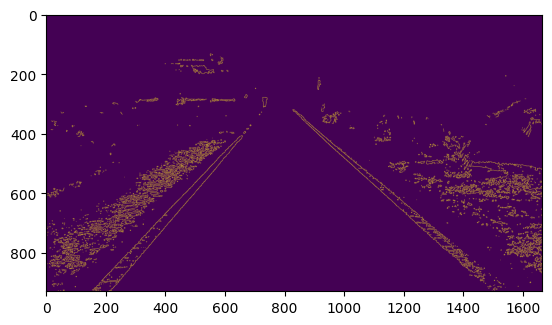

In [11]:
plt.imshow(lanes_img)
plt.show()
# marking the region of interest as
# X-axis (170px-x,100px-y), (800px-x, 200px-y), (1500px-x, 1000px-y)


# X-axis (170px-x,100px-y), (800px-x, 200px-y), (1500px-x, 1000px-y)

In [22]:
def region_of_interest(img):
    height = img.shape[0]
    polygons = np.array([[(100, height),(2000, height), (800, 200)]])
    mask = np.zeros_like(img)
    # Fill the triangle with white color
    cv2.fillPoly(mask, polygons, 255)
    output = cv2.bitwise_and(img, img, mask=mask)
    return output


# Using Hough Transform to detect lines


In [18]:
def display_lines(img, lines):
    # Create a blank 3-channel (color) image
    img_shape = img.shape
    line_image = np.zeros((img_shape[0], img_shape[1], 3), dtype=np.uint8)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)  # blue line
    return line_image

# def average_slope_intercept(image, lines):
#     left_fit = []
#     right_fit = []
#     for line in lines:
#         x1, y1, x2, y2 = line.reshape(4)
#         parameters = np.polyfit((x1, x2), (y1, y2), 1)
#         slope = parameters[0]
#         intercept = parameters[1]
#         if slope < 0:
#             left_fit.append((slope, intercept))
#         else:
#             right_fit.append((slope, intercept))
#     left_fit_average = np.average(left_fit, axis=0)
#     right_fit_average = np.average(right_fit, axis=0)
#     left_line = make_coordinates(image, left_fit_average)
#     right_line = make_coordinates(image, right_fit_average)
#     return np.array([left_line, right_line])

def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []

    if lines is None:
        return []

    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))

    averaged_lines = []

    if len(left_fit) > 0:
        left_fit_average = np.average(left_fit, axis=0)
        left_line = make_coordinates(image, left_fit_average)
        averaged_lines.append(left_line)

    if len(right_fit) > 0:
        right_fit_average = np.average(right_fit, axis=0)
        right_line = make_coordinates(image, right_fit_average)
        averaged_lines.append(right_line)

    return np.array(averaged_lines)


def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1 * (3 / 5))
    x1 = int((y1 - intercept) / slope)
    x2 = int((y2 - intercept) / slope)
    return np.array([x1, y1, x2, y2])

test_image2 = cv2.imread('../DIP Project Videos/Screenshot 2025-05-11 110347.png')
lanes_img = separate_canny_based_canny(test_image2)
cv2.imshow('separate_canny_based_canny', lanes_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

roi_image = region_of_interest(lanes_img)
cv2.imshow('region_of_interest', roi_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

lines = cv2.HoughLinesP(roi_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
averaged_lines = average_slope_intercept(test_image2, lines)
line_image = display_lines(test_image2, averaged_lines)
comb_image = cv2.addWeighted(test_image2, 0.8, line_image, 1, 1)



cv2.imshow('lines', comb_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Using Hough Transform basic lane detection algorithm completed


In [23]:
cap = cv2.VideoCapture("../DIP Project Videos/PXL_20250325_043754655.TS.mp4")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    lanes_img = separate_canny_based_canny(frame)
    cv2.imshow('separate_canny_based_canny', lanes_img)

    roi_image = region_of_interest(lanes_img)
    cv2.imshow('region_of_interest', roi_image)

    lines = cv2.HoughLinesP(roi_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    averaged_lines = average_slope_intercept(frame, lines)
    line_image = display_lines(frame, averaged_lines)
    comb_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)

    cv2.imshow('lines', comb_image)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
